In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('data-set/tvmarketing.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


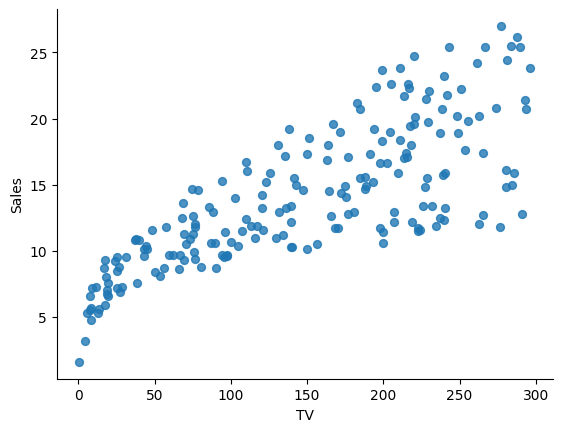

In [10]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='TV', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
##correlation
data.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


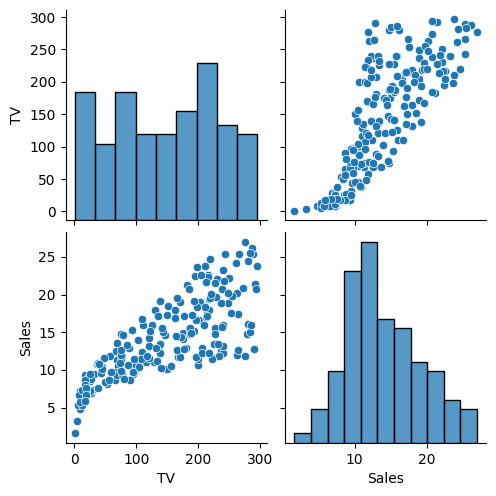

In [12]:
sns.pairplot(data)

In [13]:
##independent variable and dependent variable
## "independent" Must be a DataFrame or 2D-array
X=data[['TV']]
Y=data['Sales']

In [14]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
##Spliting the Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [16]:
X_train

,TV
143,104.6
118,125.7
84,213.5
97,184.9
198,283.6
...,...
106,25.0
72,26.8
183,287.6
27,240.1


### Standardization
The standardization formula is used to transform a dataset so that it has a mean of 0 and a standard deviation of 1. It is calculated using the following formula:

$$ z = \frac{{x - \mu}}{{\sigma}} $$

Where:
- $z$ is the standardized value.
- $ x $ is the original value.
- $ \mu $ is the mean of the dataset.
- $ \sigma $ is the standard deviation of the dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(array([2., 4., 5., 5., 6., 1., 3., 4., 3., 3., 0., 7., 4., 2., 2., 3., 2.,
        1., 5., 1., 3., 1., 5., 4., 2., 2., 1., 0., 1., 4., 2., 4., 2., 4.,
        2., 4., 7., 5., 4., 2., 7., 2., 2., 1., 4., 1., 3., 3., 2., 3.]),
 array([-1.62982088, -1.56272849, -1.4956361 , -1.42854372, -1.36145133,
        -1.29435894, -1.22726656, -1.16017417, -1.09308178, -1.0259894 ,
        -0.95889701, -0.89180462, -0.82471224, -0.75761985, -0.69052746,
        -0.62343507, -0.55634269, -0.4892503 , -0.42215791, -0.35506553,
        -0.28797314, -0.22088075, -0.15378837, -0.08669598, -0.01960359,
         0.04748879,  0.11458118,  0.18167357,  0.24876596,  0.31585834,
         0.38295073,  0.45004312,  0.5171355 ,  0.58422789,  0.65132028,
         0.71841266,  0.78550505,  0.85259744,  0.91968982,  0.98678221,
         1.0538746 ,  1.12096699,  1.18805937,  1.25515176,  1.32224415,
         1.38933653,  1.45642892,  1.52352131,  1.59061369,  1.65770608,
         1.72479847]),
 <BarContainer object

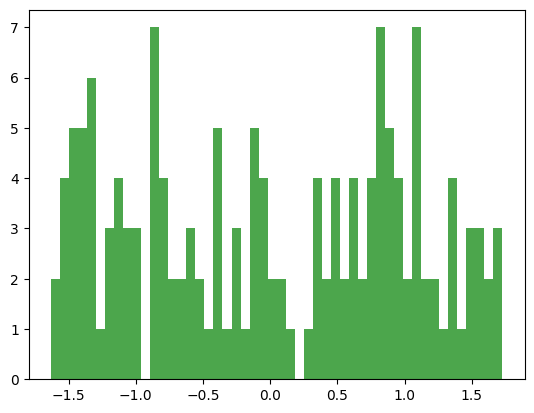

In [ ]:
plt.hist(X_train, bins=50, color='green', alpha=0.7)

## Linear-Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X=X_train,y=Y_train)

LinearRegression()

**Simple linear regression formula**

$$y = mx + b$$

* $y$ is the dependent variable (the variable we're trying to
predict),
* $x$ is the independent variable (the variable we're using to make predictions),
* $m$ is the slope of the regression line, representing the change in yy for a unit change in xx,
* $b$ is the y-intercept, the point where the line intersects the y-axis.


In [ ]:
print(' the slope of the regression line :',regression.coef_[0])

 the slope of the regression line : 0.04596391604650503


 it means that for every one unit increase in $x$, $y$ is expected to increase by approximately $4.098194583047858$ units. This slope represents the relationship between the independent variable $x$ and the dependent variable $y$ in the context of the linear regression model.

In [ ]:
print(' The intercept :',regression.intercept_)

 The intercept : 13.861333333333333


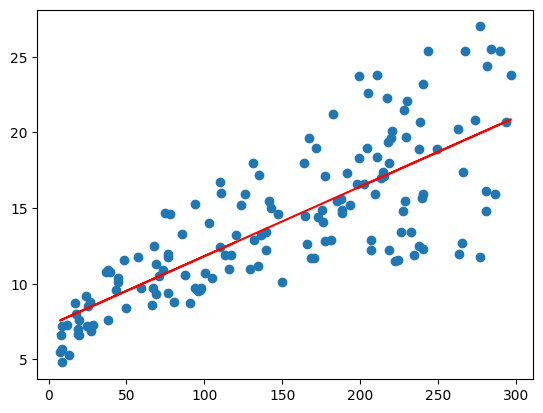

In [ ]:
# plot the fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train), color='red', label='Fitted Line')

In [ ]:
# Predection for Test Data
y_predict=regression.predict(X_test)

The formula for calculating the coefficient of determination (R-squared) for simple linear regression is:

$$R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}} $$

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_predict)
r2

0.6056150379820578

### The adjusted R-square
The formula for adjusted $ R^2 $ is an adjusted version of the coefficient of determination ($ R^2 $) that considers the number of predictors in the model. In the context of multiple linear regression, the formula is:

$$ \text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n - 1}{n - k - 1} \$$

Where:
- $ R^2 $ is the coefficient of determination.
- $ n $ is the number of observations (sample size).
- $ k $ is the number of predictors in the model (excluding the constant term).

In [ ]:
n,k=X_train.shape

In [ ]:
r2_adsj=(1-(1-r2)*((n-1)/(n-k-1)))
r2_adsj

0.6029502747251798

In [17]:
## OSL LR
import statsmodels.api as sm

In [18]:
model=sm.OLS(Y_train,X_train).fit()

In [20]:
pd.DataFrame({'model':model.predict(X_test),'Y':Y_test})

,model,Y
107,7.638683,8.7
35,24.563773,12.8
44,2.120917,8.5
122,18.927710,11.6
170,4.224935,8.4
55,16.806792,23.7
46,7.579534,10.6
113,17.710928,15.9
6,4.858675,11.8
4,15.277366,12.9


from matplotlib import pyplot as plt
_df_0['model'].plot(kind='hist', bins=20, title='model')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='model', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['model'].plot(kind='line', figsize=(8, 4), title='model')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              1309.
Date:                Sun, 12 May 2024   Prob (F-statistic):                    1.11e-75
Time:                        16:04:04   Log-Likelihood:                         -446.40
No. Observations:                 150   AIC:                                      894.8
Df Residuals:                     149   BIC:                                      897.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
model.predict([[120]])

array([10.13984438])